<a href="https://colab.research.google.com/github/dharanisriravi/Data_Science/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("student_admission_performance_dataset.csv")
df.head()


,High School GPA,Extracurricular Activities,Parental Income,Study Hours/Week,Entrance Test Score,Distance from College (km),Internet at Home,Final Year Grade
0,2.75,7,55195,39,77,93.98,Yes,C
1,3.90,3,111680,1,72,62.77,Yes,D
2,3.46,0,24000,3,63,33.49,Yes,C
3,3.20,7,90588,13,73,13.93,No,F
4,2.31,3,121042,28,51,79.40,Yes,B


In [2]:
df.info()
df.describe()
df['Final Year Grade'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   High School GPA             200 non-null    float64
 1   Extracurricular Activities  200 non-null    int64  
 2   Parental Income             200 non-null    int64  
 3   Study Hours/Week            200 non-null    int64  
 4   Entrance Test Score         200 non-null    int64  
 5   Distance from College (km)  200 non-null    float64
 6   Internet at Home            200 non-null    object 
 7   Final Year Grade            200 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 12.6+ KB


,count
Final Year Grade,
C,62
B,55
A,35
D,33
F,15


In [3]:
df.isnull().sum()


,0
High School GPA,0
Extracurricular Activities,0
Parental Income,0
Study Hours/Week,0
Entrance Test Score,0
Distance from College (km),0
Internet at Home,0
Final Year Grade,0


In [6]:
from sklearn.preprocessing import LabelEncoder

le_internet = LabelEncoder()
df['Internet at Home'] = le_internet.fit_transform(df['Internet at Home'])

le_grade = LabelEncoder()
df['Final Year Grade'] = le_grade.fit_transform(df['Final Year Grade'])


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('Final Year Grade', axis=1)
y = df['Final Year Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.225
              precision    recall  f1-score   support

           0       0.13      0.18      0.15        11
           1       0.25      0.14      0.18        14
           2       0.57      0.50      0.53         8
           3       0.11      0.20      0.14         5
           4       0.00      0.00      0.00         2

    accuracy                           0.23        40
   macro avg       0.21      0.20      0.20        40
weighted avg       0.25      0.23      0.23        40



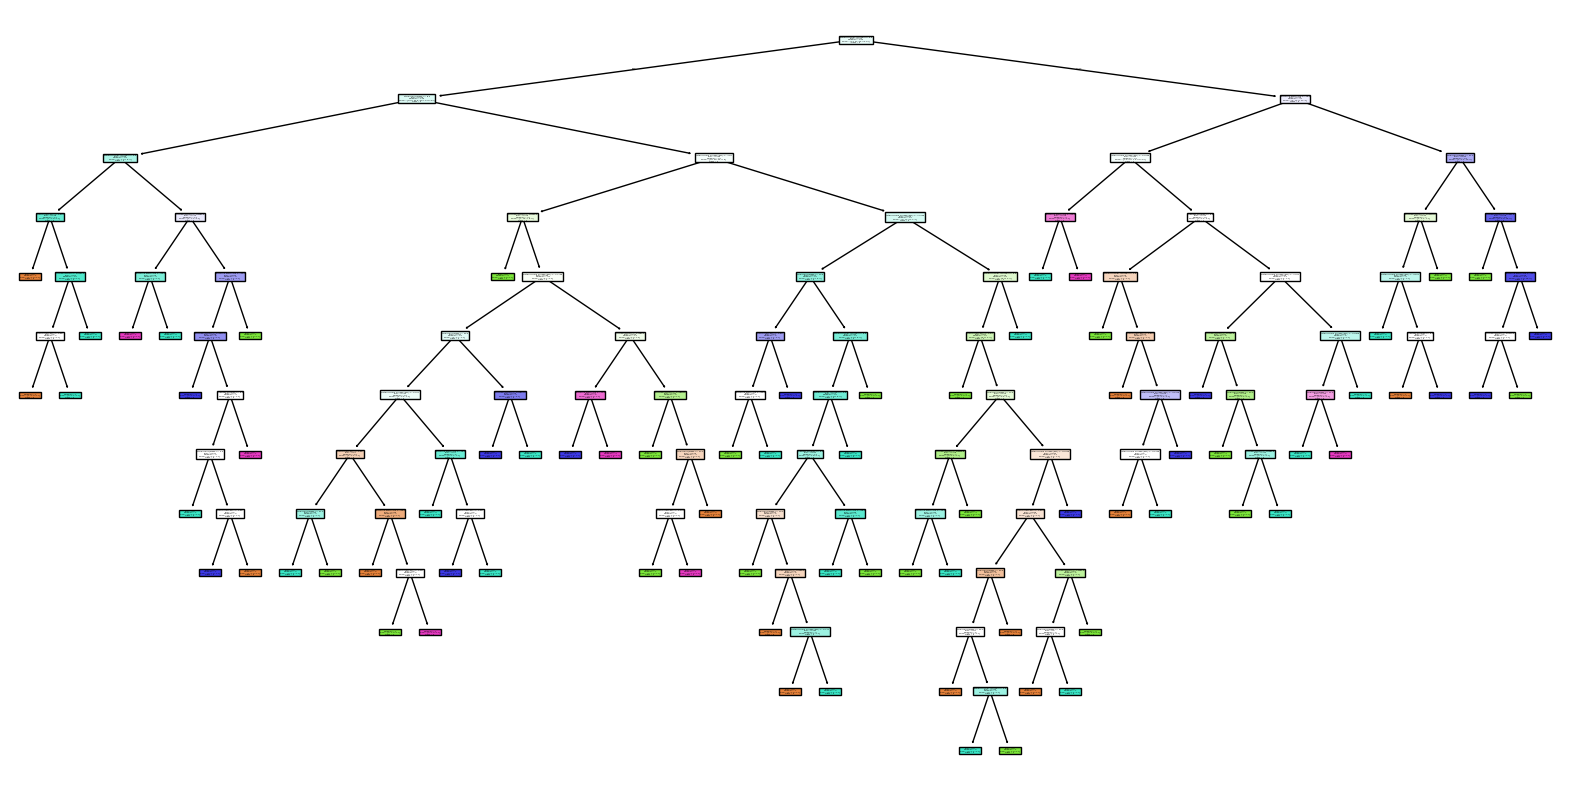

In [11]:
# Convert class names to strings
class_names_str = [str(cls) for cls in le_grade.classes_]

# Now plot the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=class_names_str, filled=True)
plt.show()


[Text(0.5457661290322581, 0.9615384615384616, 'Extracurricular Activities <= 6.5\ngini = 0.76\nsamples = 160\nvalue = [24, 41, 54, 28, 13]\nclass = 2'),
 Text(0.2625, 0.8846153846153846, 'Study Hours/Week <= 8.5\ngini = 0.74\nsamples = 116\nvalue = [19.0, 30.0, 45.0, 14.0, 8.0]\nclass = 2'),
 Text(0.40413306451612907, 0.9230769230769231, 'True  '),
 Text(0.07096774193548387, 0.8076923076923077, 'Extracurricular Activities <= 2.5\ngini = 0.64\nsamples = 24\nvalue = [3, 1, 13, 5, 2]\nclass = 2'),
 Text(0.025806451612903226, 0.7307692307692307, 'High School GPA <= 2.32\ngini = 0.3\nsamples = 11\nvalue = [2, 0, 9, 0, 0]\nclass = 2'),
 Text(0.012903225806451613, 0.6538461538461539, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0]\nclass = 0'),
 Text(0.03870967741935484, 0.6538461538461539, 'Parental Income <= 53404.0\ngini = 0.18\nsamples = 10\nvalue = [1, 0, 9, 0, 0]\nclass = 2'),
 Text(0.025806451612903226, 0.5769230769230769, 'High School GPA <= 3.36\ngini = 0.5\nsamples = 2\nvalue = [1

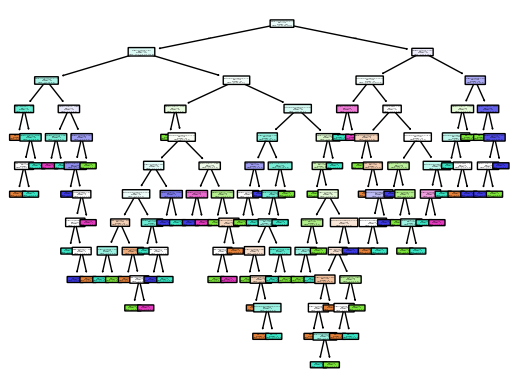

In [12]:
plot_tree(
    model,
    feature_names=X.columns,
    class_names=class_names_str,
    filled=True,
    rounded=True,
    proportion=False,  # Shows raw value counts instead of class proportions
    precision=2         # Controls decimal places
)


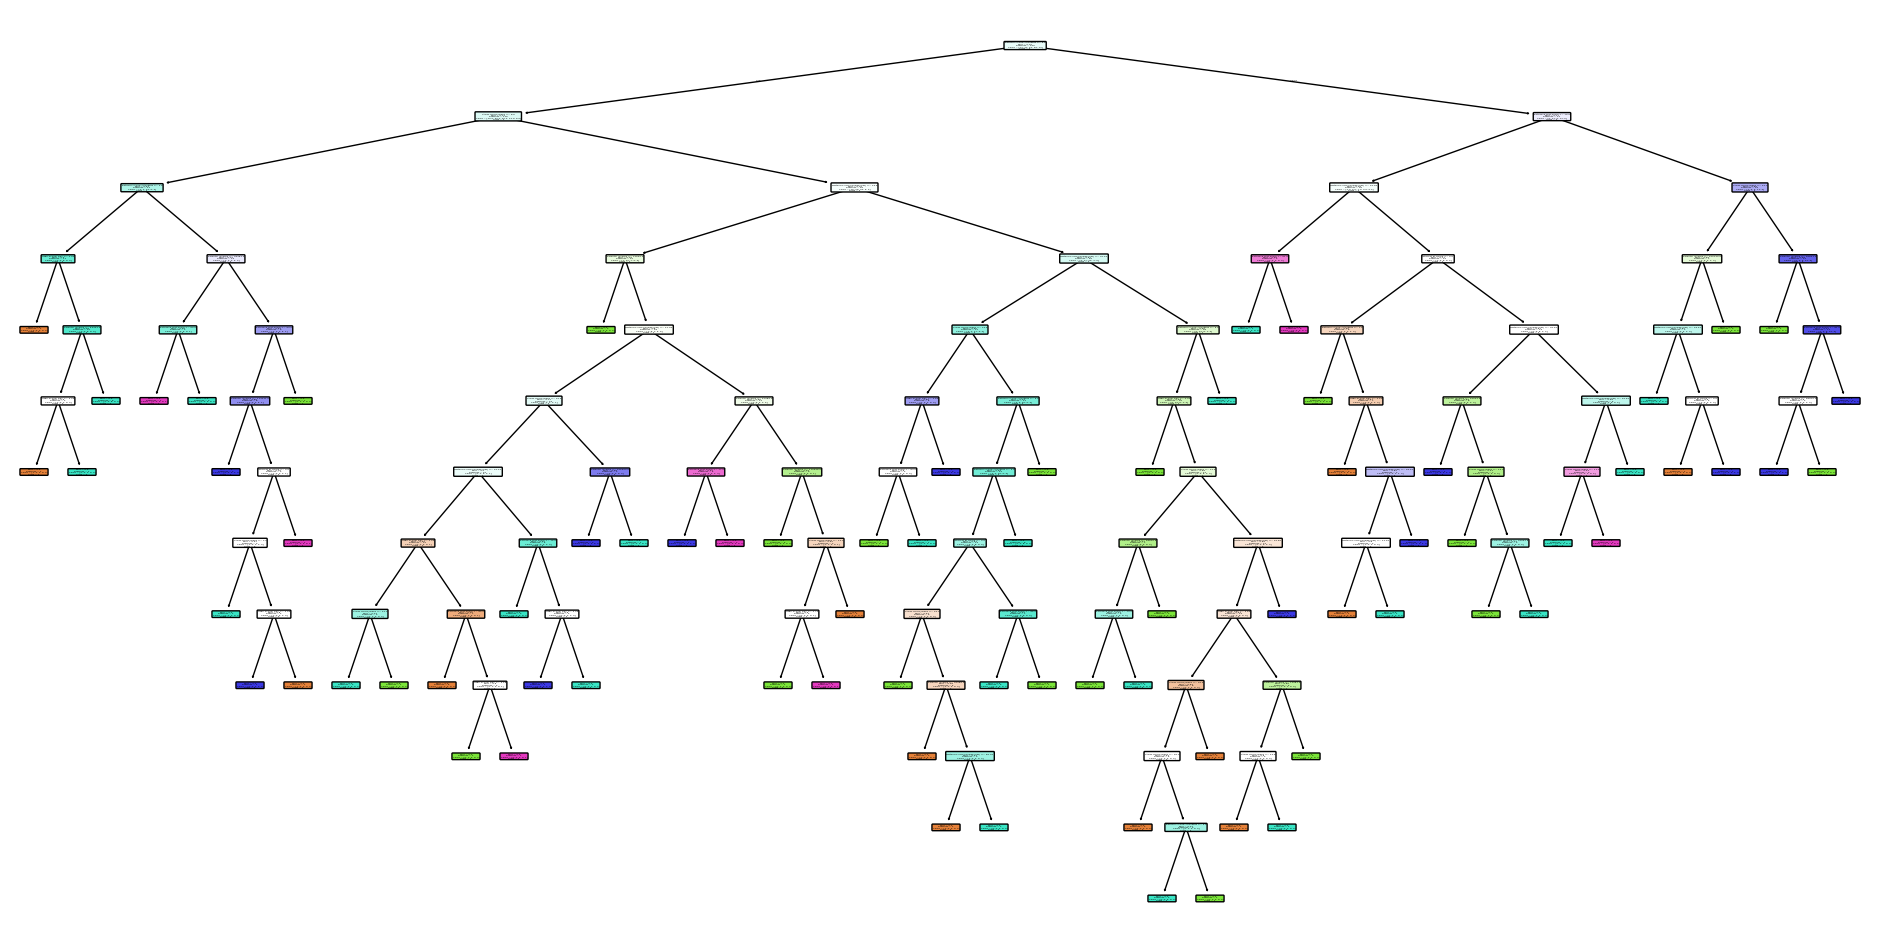

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24,12))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=class_names_str,
    filled=True,
    rounded=True,
    proportion=False,
    precision=2
)
plt.show()
